In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')
import pandas as pd

In [6]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import independent

In [7]:
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', final_kstar1=[14], final_kstar2=[14], binfrac_model=1.0, primary_model='salpeter55', ecc_model='sana12', porb_model='sana12', qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=10000)

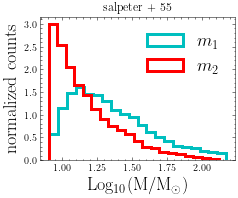

In [9]:
plt.hist(np.log10(InitialBinaries.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color="c", label='$m_1$')
plt.hist(np.log10(InitialBinaries.mass_2), bins = 20, histtype='step', density=True,
         lw=3, color="r", label='$m_2$')
plt.xlabel(r'Log$_{10}$(M/M$_{\odot}$)', size=18)
plt.ylabel('normalized counts', size=18)
plt.title("salpeter + 55")
plt.legend(prop={'size' : 18})
plt.savefig("Plots/salpeter55/ini-mass-dist.pdf")
plt.show()

In [10]:
from cosmic.evolve import Evolve

In [11]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}

In [12]:
bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

/home/pranav/miniconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/utils.py:1445: UserWarning: At least one of your initial binaries is starting in Roche Lobe Overflow:
       kstar_1  kstar_2      mass_1     mass_2      porb       ecc  \
93         1.0      1.0   62.458879  27.615005  1.707474  0.026132   
201        1.0      1.0   74.597259  38.194463  1.451772  0.102882   
217        1.0      1.0   87.595138  48.940520  1.924484  0.042743   
234        1.0      1.0  116.994326  37.435224  2.072357  0.265390   
332        1.0      1.0   72.712475  15.416621  1.497287  0.184791   
...        ...      ...         ...        ...       ...       ...   
10417      1.0      1.0   63.898689  29.248895  1.637538  0.090295   
10506      1.0      1.0   61.387025  36.143653  1.602174  0.070982   
10514      1.0      1.0   58.788091  44.242178  1.562142  0.187016   
10556      1.0      1.0   50.573075  47.322393  1.638625  0.057663   
10607      1.0      1.0   97.662363  82.582699  2.068496 

In [13]:
bh_index_1 = np.array(bcm[bcm.kstar_1==14.0].index)
bh_final_m1 = np.array(bcm[bcm.kstar_1==14.0].mass_1)

bh_index_2 = np.array(bcm[bcm.kstar_2==14.0].index)
bh_final_m2 = np.array(bcm[bcm.kstar_2==14.0].mass_2)

In [14]:
bh_ini_m1 = []
bh_ini_m2 = []

for indx in bh_index_1:
    bh_ini_m1.append(np.array(bcm[bcm.index==indx].mass_1)[0])
    
for indx in bh_index_2:
    bh_ini_m2.append(np.array(bcm[bcm.index==indx].mass_2)[0])

In [17]:
x = np.log10(bh_ini_m1)
y = np.log10(bh_final_m1)

deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10

xmin = min(x) - deltaX
xmax = max(x) + deltaX

ymin = min(y) - deltaY
ymax = max(y) + deltaY

print(xmin, xmax, ymin, ymax)

0.9517018966138531 2.2861009115792714 0.2843774085851373 1.666104356634615


In [18]:
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
import scipy.stats as st

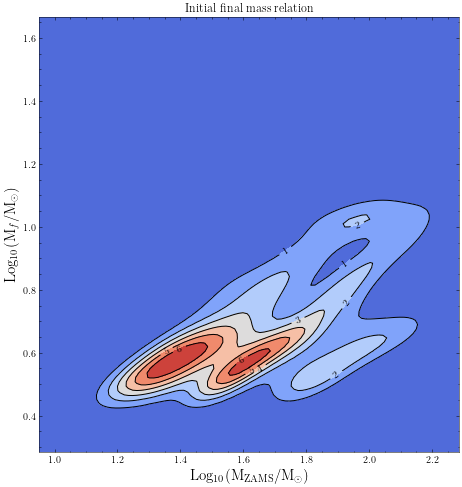

In [19]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel(r'Log$_{10}$(M$_{\text{ZAMS}}$/M$_{\odot}$)', size=15)
ax.set_ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=15)
plt.title('Initial final mass relation')
plt.savefig("Plots/salpeter55/Mi-Mf-contour.pdf")

(0.67, 0.75)

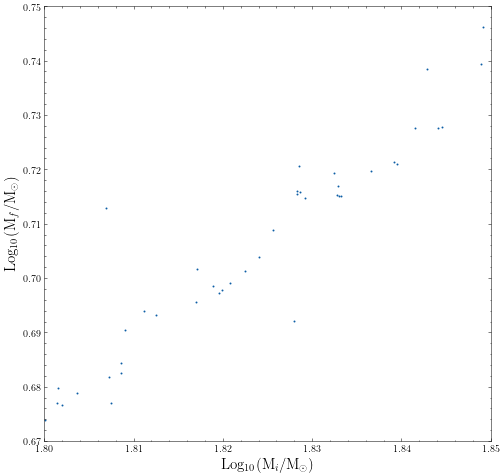

In [123]:
fig = plt.figure(figsize=(8,8))
plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.9,label="m1")
plt.xlabel(r'Log$_{10}$(M$_{i}$/M$_{\odot}$)', size=15)
plt.ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=15)
plt.xlim(1.8,1.85)
plt.ylim(0.67,0.75)

In [50]:
mia = 1.49; mib = 1.8; mic = 2.16;
mfa = 0.47; mfb = 0.67; mfc = 1.03;

m_bh = pd.DataFrame({'m1_ini': bh_ini_m1, 'm1_final': bh_final_m1,'m2_ini': bh_ini_m1, 'm2_final': bh_final_m1})

M1_bh_sort1  = m_bh[np.log10(m_bh["m1_ini"])>mia]
M1_bh_sort2 = M1_bh_sort1[np.log10(M1_bh_sort1["m1_ini"])<mib]
M1_bh_sort3 = M1_bh_sort2[np.log10(M1_bh_sort2["m1_final"])>mfa]
M1_bh_sort4 = M1_bh_sort3[np.log10(M1_bh_sort3["m1_final"])<mfb]

Mb_bh_sort1  = m_bh[np.log10(m_bh["m1_ini"])>mib]
Mb_bh_sort2 = Mb_bh_sort1[np.log10(Mb_bh_sort1["m1_ini"])<mic]
Mb_bh_sort3 = Mb_bh_sort2[np.log10(Mb_bh_sort2["m1_final"])>mfb]
Mb_bh_sort4 = Mb_bh_sort3[np.log10(Mb_bh_sort3["m1_final"])<mfc]

In [51]:
def get_alpha(mi1,mi2,mf1,mf2):
    
    m1_bh_sort1  = m_bh[np.log10(m_bh["m1_ini"])>mi1]
    m1_bh_sort2 = m1_bh_sort1[np.log10(m1_bh_sort1["m1_ini"])<mi2]
    m1_bh_sort3 = m1_bh_sort2[np.log10(m1_bh_sort2["m1_final"])>mf1]
    m1_bh_sort4 = m1_bh_sort3[np.log10(m1_bh_sort3["m1_final"])<mf2]
    
    m,b = np.polyfit(np.log10(m1_bh_sort4["m1_ini"]),np.log10(m1_bh_sort4["m1_final"]),1)
    print(m,b)
    
    return m,b

In [59]:
alpha1,b1 = get_alpha(1.5,1.54,0.48,0.51)

0.6103258341636624 -0.4300404613433779


In [134]:
alpha2,b2 = get_alpha(1.8,1.82,0.67,0.691)

1.040182815886068 -1.1972422357525547


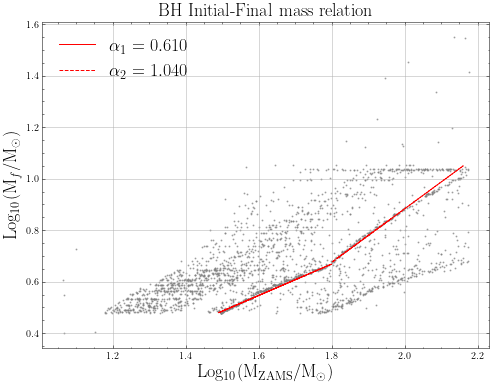

In [137]:
plt.figure(figsize=[8,6])
plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.9,color="gray",alpha=0.6)
plt.plot(np.log10(M1_bh_sort4["m1_ini"]),alpha1*np.log10(M1_bh_sort4["m1_ini"])+b1,"r",label=r"$\alpha_{1} = %3.3f$"%(alpha1))
plt.plot(np.log10(Mb_bh_sort4["m1_ini"]),alpha2*np.log10(Mb_bh_sort4["m1_ini"])+b2,"r--",label=r"$\alpha_{2} = %3.3f$"%(alpha2))
plt.grid()
plt.xlabel(r'Log$_{10}$(M$_{\text{ZAMS}}$/M$_{\odot}$)', size=18)
plt.ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=18)
plt.title("BH Initial-Final mass relation",size=18)
plt.legend(prop={'size' : 18})
plt.savefig("Plots/salpeter55/Mi-Mf-loglog.pdf")